In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [24]:
supply_df = pd.read_csv('../../data/raw/gen.csv', parse_dates=['Date (MST)'], index_col='Date (MST)')
supply_df = supply_df.sort_values(by='Date (MST)')
supply_df.shape
supply_df

,Date - MST,Fuel Type,Date,Date (MPT),Availability Factor,Availability Utilization,Capacity Factor,Maximum Capacity,System Available,System Capacity,System Generation,Total Generation
Date (MST),,,,,,,,,,,,
2021-12-29 00:00:00,12/29/2021 12:00:00 AM,Coal,12/29/2021,12/29/2021 12:00:00 AM,0.911462,0.932808,0.849741,2530,2306,2530.0,2151.055420,2149.845886
2021-12-29 00:00:00,12/29/2021 12:00:00 AM,Hydro,12/29/2021,12/29/2021 12:00:00 AM,0.727069,0.219845,0.163281,894,650,894.3,142.899168,145.972886
2021-12-29 00:00:00,12/29/2021 12:00:00 AM,Wind,12/29/2021,12/29/2021 12:00:00 AM,0.832525,0.390555,0.326138,2269,1889,2269.0,737.757671,740.007579
2021-12-29 00:00:00,12/29/2021 12:00:00 AM,Dual Fuel,12/29/2021,12/29/2021 12:00:00 AM,1.000000,0.336246,0.333481,155,155,155.0,52.118105,51.689480
2021-12-29 00:00:00,12/29/2021 12:00:00 AM,Other,12/29/2021,12/29/2021 12:00:00 AM,0.392670,0.487909,0.643631,382,150,266.7,73.186300,245.867050
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30 22:00:00,4/30/2023 10:00:00 PM,Other,4/30/2023,4/30/2023 11:00:00 PM,0.293532,0.527279,0.395610,402,118,286.7,62.218900,159.035237
2023-04-30 22:00:00,4/30/2023 10:00:00 PM,Combined Cycle,4/30/2023,4/30/2023 11:00:00 PM,0.840713,0.653824,0.624681,1852,1557,1852.0,1018.004138,1156.909656
2023-04-30 22:00:00,4/30/2023 10:00:00 PM,Coal,4/30/2023,4/30/2023 11:00:00 PM,1.000000,0.585424,0.584431,820,820,820.0,480.048000,479.233659


In [18]:
supply_df.index = pd.to_datetime(supply_df.index)
lowest_year = supply_df.index.year.min()
highest_year = supply_df.index.year.max()
earliest_date = supply_df.index.min()
latest_date = supply_df.index.max()

print('Earliest date:', earliest_date)
print('Latest date:', latest_date)
print('Lowest year of region df:', lowest_year)
print('Highest year of region df:', highest_year)
print('Shape:', supply_df.shape)
print(supply_df['Fuel Type'].unique())


Earliest date: 2021-12-29 00:00:00
Latest date: 2023-04-30 22:00:00
Lowest year of region df: 2021
Highest year of region df: 2023
Shape: (123038, 12)
['Coal' 'Hydro' 'Wind' 'Dual Fuel' 'Other' 'Solar' 'Gas Fired Steam'
 'Storage' 'Cogeneration' 'Combined Cycle' 'Simple Cycle']


In [25]:
reset_df = supply_df.reset_index()
reset_df

gen_df  = reset_df[['Date (MST)', 'Fuel Type', 'Total Generation']]
wide_df = gen_df.pivot(index='Date (MST)', columns='Fuel Type', values='Total Generation')

sys_df  = reset_df[['Date (MST)', 'Fuel Type', 'System Generation']]
wide_sys_df = sys_df.pivot(index='Date (MST)', columns='Fuel Type', values='System Generation')

sys_cap_df  = reset_df[['Date (MST)', 'Fuel Type', 'System Capacity']]
wide_sys_cap_df = sys_cap_df.pivot(index='Date (MST)', columns='Fuel Type', values='System Capacity')

sys_avail_df  = reset_df[['Date (MST)', 'Fuel Type', 'System Available']]
wide_sys_avail_df = sys_avail_df.pivot(index='Date (MST)', columns='Fuel Type', values='System Available')

max_cap_df  = reset_df[['Date (MST)', 'Fuel Type', 'Maximum Capacity']]
wide_max_cap_df = max_cap_df.pivot(index='Date (MST)', columns='Fuel Type', values='Maximum Capacity')

cap_fac_df  = reset_df[['Date (MST)', 'Fuel Type', 'Capacity Factor']]
wide_cap_fac_df = cap_fac_df.pivot(index='Date (MST)', columns='Fuel Type', values='Capacity Factor')

avail_util  = reset_df[['Date (MST)', 'Fuel Type', 'Availability Utilization']]
wide_avail_util = avail_util.pivot(index='Date (MST)', columns='Fuel Type', values='Availability Utilization')

avail_fact  = reset_df[['Date (MST)', 'Fuel Type', 'Availability Factor']]
wide_avail_fact = avail_fact.pivot(index='Date (MST)', columns='Fuel Type', values='Availability Factor')


In [26]:
ail_df = pd.read_csv('../../data/processed/ail_price.csv', parse_dates=['date'], index_col='date')
ail_df = ail_df.drop('Unnamed: 0', axis=1)
ail_df = ail_df.sort_values(by='date')
ail_df.head()

,hourly_profile,season,ail,gas_price,price,spark_spread
date,,,,,,
2015-01-01 00:00:00,OFF PEAK,WINTER,9210,2.63,37.45,17.725
2015-01-01 01:00:00,OFF PEAK,WINTER,9045,2.63,34.62,14.895
2015-01-01 02:00:00,OFF PEAK,WINTER,8839,2.63,22.80,3.075
2015-01-01 03:00:00,OFF PEAK,WINTER,8742,2.63,21.05,1.325
2015-01-01 04:00:00,OFF PEAK,WINTER,8699,2.63,20.79,1.065


In [27]:
df_mar = ail_df
# df_mar = ail_df[(ail_df.index >= '2023-03-01') & (ail_df.index < '2023-04-01')]
total_gen_df = pd.merge(df_mar, wide_df,  left_index=True, right_on='Date (MST)')
total_gen_df.name = 'Total Generation (Price)'
sup_sys_df = pd.merge(df_mar, wide_sys_df,  left_index=True, right_on='Date (MST)')
sup_sys_df.name = 'System Generation'
sup_sys_cap_df = pd.merge(df_mar, wide_sys_cap_df,  left_index=True, right_on='Date (MST)')
sup_sys_cap_df.name = 'System Capacity'
sup_sys_avail_df = pd.merge(df_mar, wide_sys_avail_df,  left_index=True, right_on='Date (MST)')
sup_sys_avail_df.name = 'System Available'
sup_max_cap_avail_df = pd.merge(df_mar, wide_max_cap_df,  left_index=True, right_on='Date (MST)')
sup_max_cap_avail_df.name = 'Maximum Capacity'
sup_cap_fac_avail_df = pd.merge(df_mar, wide_cap_fac_df,  left_index=True, right_on='Date (MST)')
sup_cap_fac_avail_df.name = 'Capacity Factor'
sup_avail_util_df = pd.merge(df_mar, wide_avail_util,  left_index=True, right_on='Date (MST)')
sup_avail_util_df.name = 'Availability Utilization'
sup_avail_fact_df = pd.merge(df_mar, wide_avail_fact,  left_index=True, right_on='Date (MST)')
sup_avail_fact_df.name = 'Availability Factor'

list_df = [total_gen_df, sup_sys_df, sup_sys_cap_df, sup_sys_avail_df, sup_max_cap_avail_df, sup_cap_fac_avail_df, sup_avail_util_df, sup_avail_fact_df]

In [36]:
total_gen_df = total_gen_df.reset_index()

In [37]:
total_gen_df.to_csv('total_gen.csv', index=False)


In [28]:
corr_df = total_gen_df.corr('spearman').loc[['price']]
corr_df = corr_df[corr_df > 0.3].dropna(axis=1)
corr_df

,price,spark_spread,Combined Cycle,Gas Fired Steam,Hydro,Other,Simple Cycle,Storage
price,1.0,0.925457,0.360418,0.662843,0.31211,0.314447,0.599177,0.367254


In [8]:
df_name = total_gen_df.name
df_name

'Total Generation (Price)'

In [29]:
result_df = pd.DataFrame()

for df in list_df:
    corr_df = df.corr('spearman').loc[['price']]
    corr_df = corr_df.drop('spark_spread', axis=1)
    corr_df = corr_df.drop('price', axis=1)
    # corr_df = corr_df[(corr_df > 0.3)].dropna(axis=1)
    corr_df = corr_df[((corr_df <= 0) & (corr_df <= -0.2)) | (corr_df > 0.3)]
    corr_df.index = [f'price_{df.name}']
    result_df = pd.concat([result_df, corr_df], axis=0)

result_df


,ail,gas_price,Coal,Cogeneration,Combined Cycle,Dual Fuel,Gas Fired Steam,Hydro,Other,Simple Cycle,Solar,Storage,Wind
price_Total Generation (Price),NaN,NaN,NaN,NaN,0.360418,NaN,0.662843,0.312110,0.314447,0.599177,NaN,0.367254,-0.567092
price_System Generation,NaN,NaN,NaN,NaN,0.380683,NaN,0.665033,0.311979,0.408025,0.579628,NaN,NaN,-0.564581
price_System Capacity,NaN,NaN,NaN,NaN,NaN,0.32046,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price_System Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price_Maximum Capacity,NaN,NaN,NaN,NaN,NaN,0.32046,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price_Capacity Factor,NaN,NaN,NaN,NaN,0.340484,NaN,0.661755,0.312110,0.311285,0.596811,NaN,0.373132,-0.598903
price_Availability Utilization,NaN,NaN,NaN,NaN,0.607056,NaN,0.668322,0.312851,0.639494,0.644248,NaN,NaN,-0.584827
price_Availability Factor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
result_df = pd.DataFrame()

for df in list_df:
    corr_df = df.corr().loc[['price']]
    corr_df = corr_df.drop('spark_spread', axis=1)
    corr_df = corr_df.drop('price', axis=1)
    corr_df = corr_df[(corr_df > 0.3)].dropna(axis=1)
    corr_df.index = [f'price_{df.name}']
    result_df = pd.concat([result_df, corr_df], axis=0)

result_df


,Gas Fired Steam,Other,Simple Cycle,Combined Cycle
price_Total Generation (Price),0.575133,0.547509,0.457115,NaN
price_System Generation,0.574141,0.658649,0.498206,NaN
price_System Capacity,NaN,NaN,NaN,NaN
price_System Available,NaN,NaN,NaN,NaN
price_Maximum Capacity,NaN,NaN,NaN,NaN
price_Capacity Factor,0.575133,0.547509,0.457115,NaN
price_Availability Utilization,0.552005,0.699098,0.513995,0.360994
price_Availability Factor,NaN,NaN,NaN,NaN


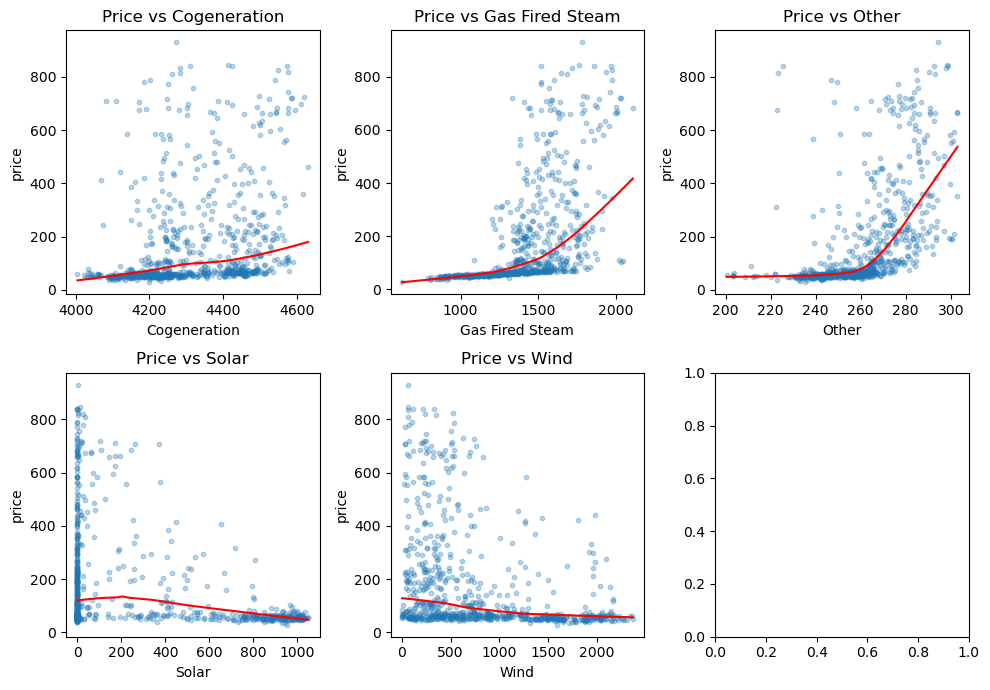

In [11]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

columns = [ 'Cogeneration', 'Gas Fired Steam', 'Other', 'Solar', 'Wind']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))
axs = axs.flatten()

for i, col in enumerate(columns):
    plt.sca(axs[i])
    plt.scatter(total_gen_df[col], total_gen_df['price'], alpha=0.3, s=10)
    plt.xlabel(col)
    plt.ylabel('price')
    plt.title(f'Price vs {col}')
    lowess = sm.nonparametric.lowess(total_gen_df['price'], total_gen_df[col])
    plt.plot(lowess[:, 0], lowess[:, 1], color='red')

plt.tight_layout()
plt.show()


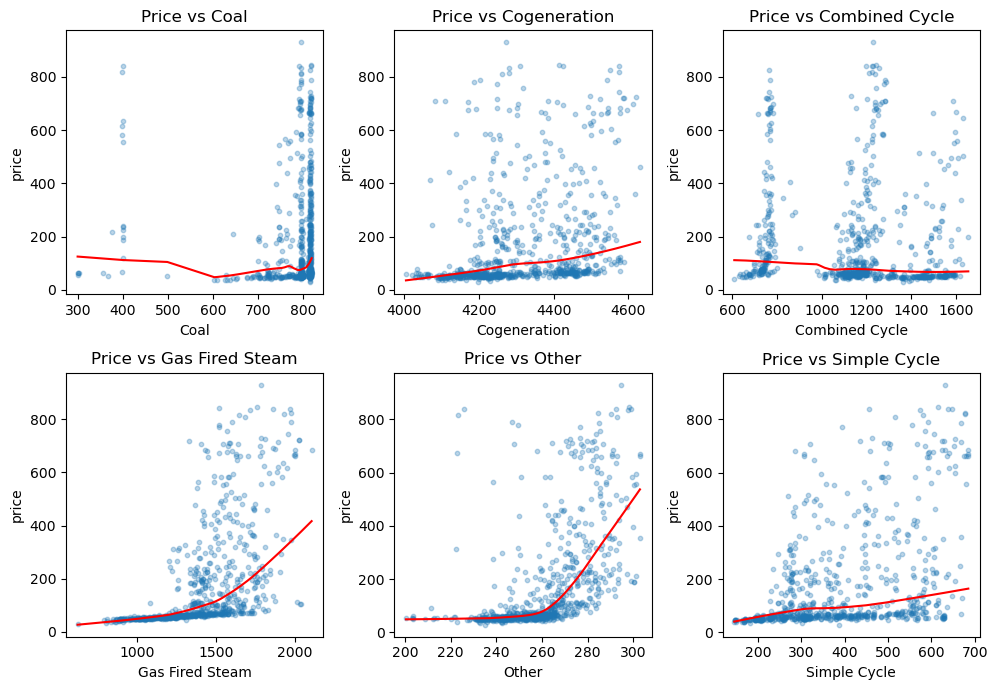

In [12]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

columns = ['Coal', 'Cogeneration', 'Combined Cycle', 'Gas Fired Steam', 'Other', 'Simple Cycle']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))
axs = axs.flatten()

for i, col in enumerate(columns):
    plt.sca(axs[i])
    plt.scatter(total_gen_df[col], total_gen_df['price'], alpha=0.3, s=10)
    plt.xlabel(col)
    plt.ylabel('price')
    plt.title(f'Price vs {col}')
    lowess = sm.nonparametric.lowess(total_gen_df['price'], total_gen_df[col])
    plt.plot(lowess[:, 0], lowess[:, 1], color='red')

plt.tight_layout()
plt.show()
